<a href="https://colab.research.google.com/github/crislmfroes/tensorflow-colab/blob/master/classificador_de_roupas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(img_treino, categoria_treino), (img_teste, categoria_teste) = fashion_mnist.load_data()

In [0]:
nomes_categorias = ['Camiseta', 'Calça', 'Suéter', 'Vestido', 'Casaco', 'Sandália', 'Camisa', 'Sneaker', 'Bolsa', 'Bota']

In [4]:
img_treino.shape, img_teste.shape

((60000, 28, 28), (10000, 28, 28))

In [7]:
len(categoria_treino), len(categoria_teste)

(60000, 10000)

In [8]:
categoria_treino, categoria_teste

(array([9, 0, 0, ..., 3, 0, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=uint8))

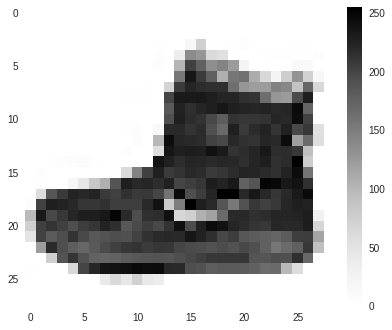

In [9]:
plt.figure()
plt.imshow(img_treino[0])
plt.colorbar()
plt.grid(False)

In [0]:
img_treino = img_treino / 255.
img_teste = img_teste / 255.

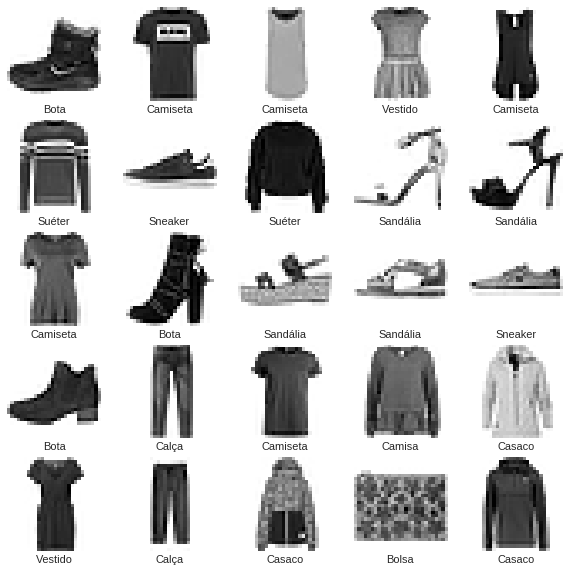

In [11]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img_treino[i], cmap=plt.cm.binary)
  plt.xlabel(nomes_categorias[categoria_treino[i]])

In [0]:
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(len(nomes_categorias), activation='softmax')
])

In [0]:
modelo.compile(optimizer=tf.train.AdamOptimizer(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [15]:
modelo.fit(img_treino, categoria_treino, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 130us/step - loss: 0.4969 - acc: 0.8265
Epoch 2/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.3759 - acc: 0.8650
Epoch 3/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.3370 - acc: 0.8778
Epoch 4/5
60000/60000 [==============================] - 6s 98us/step - loss: 0.3132 - acc: 0.8854
Epoch 5/5
60000/60000 [==============================] - 6s 100us/step - loss: 0.2962 - acc: 0.8918


In [16]:
perda_teste, precisao_teste = modelo.evaluate(img_teste, categoria_teste)
print('Precisão durante o teste: {}'.format(precisao_teste))

10000/10000 [==============================] - 1s 65us/step
Precisão durante o teste: 0.8756


In [0]:
predicoes = modelo.predict(img_teste)

In [18]:
predicoes[0]

array([1.92467360e-05, 4.41741889e-07, 1.16668411e-06, 3.37549082e-08,
       3.69637263e-07, 1.51405088e-03, 3.83735778e-06, 2.52572466e-02,
       1.01881915e-05, 9.73193407e-01], dtype=float32)

In [20]:
np.argmax(predicoes[0]) == categoria_teste[0]

True

In [0]:
def mostra_imagem(i, vetor_predicoes, categoria_certa, imagem):
  vetor_predicoes, categoria_certa, imagem = vetor_predicoes[i], categoria_certa[i], imagem[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(imagem, cmap=plt.cm.binary)
  categoria_detectada = np.argmax(vetor_predicoes)
  if categoria_detectada == categoria_certa:
    cor = 'blue'
  else:
    cor = 'red'
  plt.xlabel('{}, {:2.0f}%, ({})'.format(nomes_categorias[categoria_detectada], 100*np.max(vetor_predicoes), nomes_categorias[categoria_certa], color=cor))

In [0]:
def mostra_vetor_valores(i, vetor_predicoes, categoria_certa):
  vetor_predicoes, categoria_certa = vetor_predicoes[i], categoria_certa[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafico = plt.bar(range(len(nomes_categorias)), vetor_predicoes, color='#777777')
  plt.ylim([0,1])
  categoria_detectada = np.argmax(vetor_predicoes)
  grafico[categoria_detectada].set_color('red')
  grafico[categoria_certa].set_color('blue')

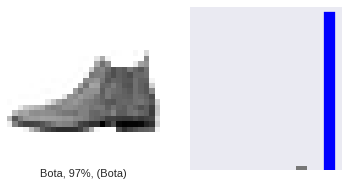

In [33]:
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
mostra_imagem(i, predicoes, categoria_teste, img_teste)
plt.subplot(1, 2, 2)
mostra_vetor_valores(i, predicoes, categoria_teste)

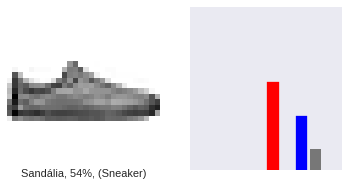

In [34]:
i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
mostra_imagem(i, predicoes, categoria_teste, img_teste)
plt.subplot(1, 2, 2)
mostra_vetor_valores(i, predicoes, categoria_teste)

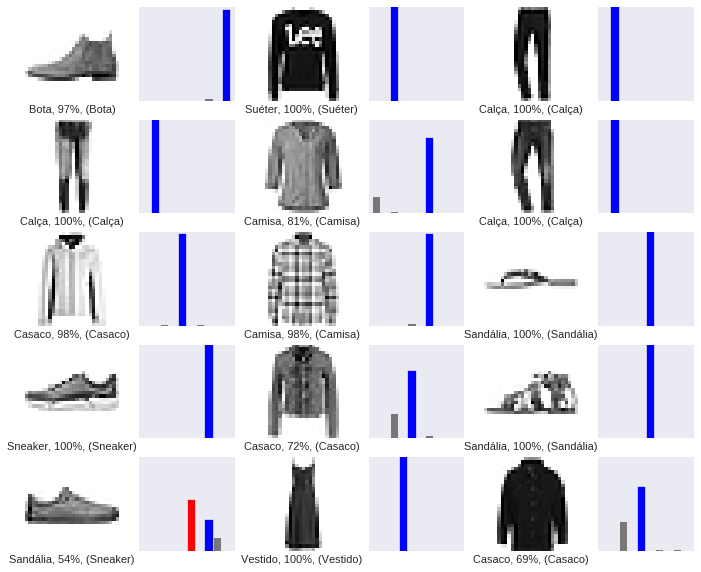

In [38]:
n_linhas = 5
n_colunas = 3
n_imagens = n_linhas * n_colunas
plt.figure(figsize=(2 * 2 * n_colunas, 2 * n_linhas))
for i in range(n_imagens):
  plt.subplot(n_linhas, 2 * n_colunas, 2 * i + 1)
  mostra_imagem(i, predicoes, categoria_teste, img_teste)
  plt.subplot(n_linhas, 2 * n_colunas, 2 * i + 2)
  mostra_vetor_valores(i, predicoes, categoria_teste)

In [42]:
img = img_teste[0]
img.shape

(28, 28)

In [43]:
img = np.expand_dims(img, 0)
img.shape

(1, 28, 28)

In [44]:
predicao_unica = modelo.predict(img)
print(predicao_unica)

[[1.9246721e-05 4.4174189e-07 1.1666841e-06 3.3754908e-08 3.6963795e-07
  1.5140501e-03 3.8373651e-06 2.5257247e-02 1.0188182e-05 9.7319341e-01]]


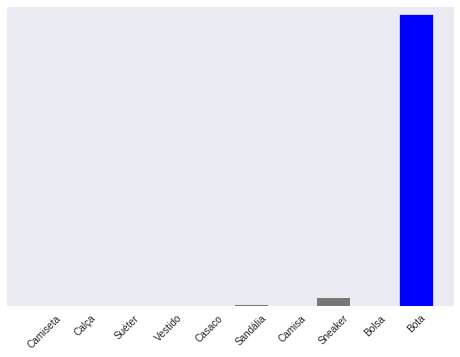

In [47]:
mostra_vetor_valores(0, predicao_unica, categoria_teste)
_ = plt.xticks(range(10), nomes_categorias, rotation=45)

In [48]:
np.argmax(predicao_unica[0])

9

In [0]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.